# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore', category=pd.errors.PerformanceWarning)

In [2]:
# Load .env enviroment variables
load_dotenv("env.txt")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_data = btc_response.json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_response = requests.get(eth_url)
eth_data = eth_response.json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']


# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $40452.00
The current value of your 5.3 ETH is $9463.10


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
api_key = os.getenv("alpaca_api_key")
api_secret_key = os.getenv("alpaca_api_key_secret")

# Create the Alpaca API object
alpaca = tradeapi.REST(
api_key,
api_secret_key,
api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2023-10-23", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                             \
                           close  high      low trade_count  open    volume   
timestamp                                                                     
2023-10-23 04:00:00+00:00  92.36  92.5  91.5819       35585  91.7  12913511   

                                         SPY                             \
                                vwap   close    high    low trade_count   
timestamp                                                                 
2023-10-23 04:00:00+00:00  92.292301  420.46  424.45  417.8      662878   

                                                         
                             open    volume        vwap  
timestamp                                                
2023-10-23 04:00:00+00:00  419.61  89817959  421.430687

In [9]:
# Pick AGG and SPY close prices
spy_close_price = float(df_portfolio["SPY"]["close"])
agg_close_price = float(df_portfolio["AGG"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $92.36
Current SPY closing price: $420.46


/var/folders/1j/_3by7tfx6tbbw4q504yz2ssr0000gn/T/ipykernel_68064/2322465747.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  spy_close_price = float(df_portfolio["SPY"]["close"])
/var/folders/1j/_3by7tfx6tbbw4q504yz2ssr0000gn/T/ipykernel_68064/2322465747.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  agg_close_price = float(df_portfolio["AGG"]["close"])


In [10]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21023.00
The current value of your 200 AGG shares is $18472.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto = my_btc_value + my_eth_value
total_shares = my_agg_value + my_spy_value

# Create savings DataFrame
df_savings = pd.DataFrame({
    "amount": [total_crypto,total_shares]}, index = ["Crypto", "Shares"]) 

# Display savings DataFrame
display(df_savings)

,amount
Crypto,49915.097
Shares,39495.000


<Axes: title={'center': 'Assets Savings'}, ylabel='amount'>

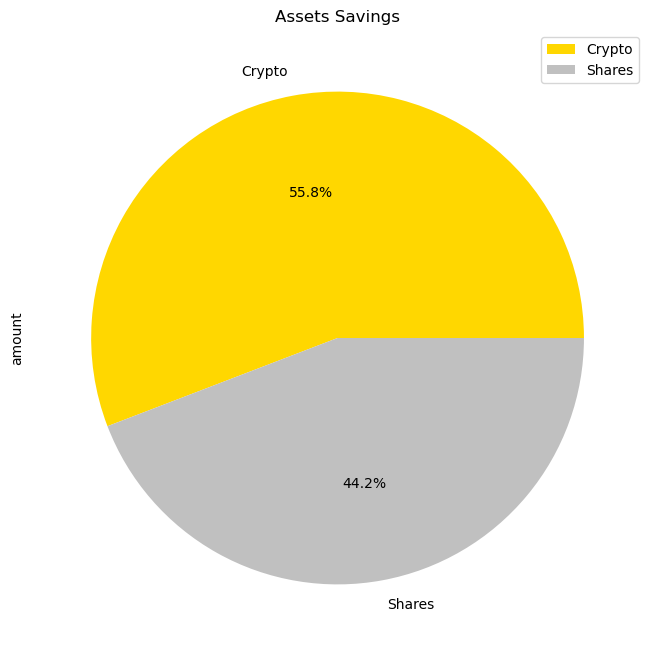

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y = "amount", title= "Assets Savings", colors = ('gold','silver'), figsize = (15,8), autopct='%1.1f%%')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations, you have enough money")
elif total_savings == emergency_fund:
    print("Congratulations, you have an adequte emergency fund!")
else:
    print("You need to save more, you have an inadequte emergency fund")

Congratulations, you have enough money


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
timeframe = "1Day"
tickers = ["SPY","AGG"]

df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = df_ticker[df_ticker["symbol"]=="SPY"].drop("symbol", axis=1)
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.index = df_stock_data.index.date
df_stock_data.head()

AGG                                                   \
              close      high       low trade_count    open   volume   
2016-05-02  110.605  110.7400  110.5200       15122  110.74  3608552   
2016-05-03  110.810  110.9450  110.7500       15663  110.89  3128774   
2016-05-04  110.860  110.9315  110.7595       13984  110.91  3096337   
2016-05-05  111.140  111.1600  110.8010       15708  110.92  3052967   
2016-05-06  110.970  111.1200  110.9700       12697  111.12  2922700   

                             SPY                                      \
                  vwap     close    high     low trade_count    open   
2016-05-02  110.626939  207.9700  208.18  206.41      263586  206.92   
2016-05-03  110.864495  206.1592  206.80  205.28      377523  206.52   
2016-05-04  110.877983  205.0100  205.85  204.42      345266  204.99   
2016-05-05  111.030002  204.9700  205.98  204.47      280626  205.56   
2016-05-06  111.027631  205.7200  205.77  203.88      340162  204.06   

                                   
               volume        vwap  
2016-05-02   64747229  207.305695  
2016-05-03  108050343  206.309997  
2016-05-04   94995641  205.086315  
2016-05-05   68425268  205.140615  
2016-05-06   90999800  204.943796

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40,0.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_thirty.portfolio_data.head()

AGG                                                   \
              close      high       low trade_count    open   volume   
2016-05-02  110.605  110.7400  110.5200       15122  110.74  3608552   
2016-05-03  110.810  110.9450  110.7500       15663  110.89  3128774   
2016-05-04  110.860  110.9315  110.7595       13984  110.91  3096337   
2016-05-05  111.140  111.1600  110.8010       15708  110.92  3052967   
2016-05-06  110.970  111.1200  110.9700       12697  111.12  2922700   

                                          SPY                              \
                  vwap daily_return     close    high     low trade_count   
2016-05-02  110.626939          NaN  207.9700  208.18  206.41      263586   
2016-05-03  110.864495     0.001853  206.1592  206.80  205.28      377523   
2016-05-04  110.877983     0.000451  205.0100  205.85  204.42      345266   
2016-05-05  111.030002     0.002526  204.9700  205.98  204.47      280626   
2016-05-06  111.027631    -0.001530  205.7200  205.77  203.88      340162   

                                                        
              open     volume        vwap daily_return  
2016-05-02  206.92   64747229  207.305695          NaN  
2016-05-03  206.52  108050343  206.309997    -0.008707  
2016-05-04  204.99   94995641  205.086315    -0.005574  
2016-05-05  205.56   68425268  205.140615    -0.000195  
2016-05-06  204.06   90999800  204.943796     0.003659

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002854,0.994227,0.999793,1.002312,0.999529,1.004704,1.005738,1.004494,0.996663,1.003527,...,1.010280,0.998255,0.994020,1.011690,1.000187,1.014484,1.005397,0.992526,0.993102,1.003441
2,1.010024,0.992963,0.995059,1.008492,1.002137,1.006367,1.010144,1.006755,0.995384,1.010215,...,1.000437,0.991164,0.995607,1.016597,1.000699,1.016044,1.014676,0.991766,0.974356,1.003704
3,1.018857,1.002428,0.997985,1.013239,1.006702,1.015479,1.013806,1.013799,0.998758,1.016509,...,1.004530,0.990448,0.996925,1.015588,0.995833,1.016390,1.015170,0.990195,0.979537,1.003395
4,1.007947,0.998839,0.999683,1.011924,1.001950,1.025092,1.009107,1.011851,0.989093,1.020566,...,0.999941,0.982308,0.997247,1.029720,0.987809,1.020860,1.005214,0.990197,0.974155,0.993670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.275548,23.180533,21.046304,11.120079,38.371521,5.452552,4.057980,22.071668,17.641910,45.398868,...,10.113869,8.251122,14.049766,5.176350,4.112275,5.800096,5.097119,5.830670,10.644817,37.964034
7557,6.269835,23.272105,21.190106,11.176200,38.517635,5.412035,4.052400,22.042879,17.580175,45.200697,...,10.056192,8.195745,14.025044,5.196977,4.088920,5.788645,5.128877,5.900748,10.719549,37.942962
7558,6.309514,23.465950,21.281378,11.143655,38.724749,5.378815,4.072527,21.882607,17.721371,45.316045,...,10.066354,8.173450,13.869453,5.168319,4.085532,5.797577,5.168730,5.877306,10.798096,38.170600
7559,6.300816,23.431814,21.240920,11.244837,38.913061,5.391873,4.089785,21.946164,17.662955,44.991117,...,10.207047,8.127172,13.708124,5.240215,4.109671,5.797893,5.153467,5.892281,10.940465,38.613282


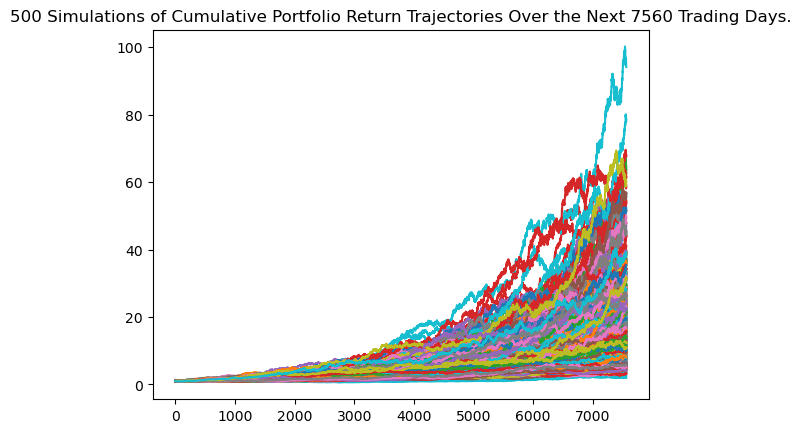

In [19]:
# Plot simulation outcomes
line_plot = MC_thirty.plot_simulation()

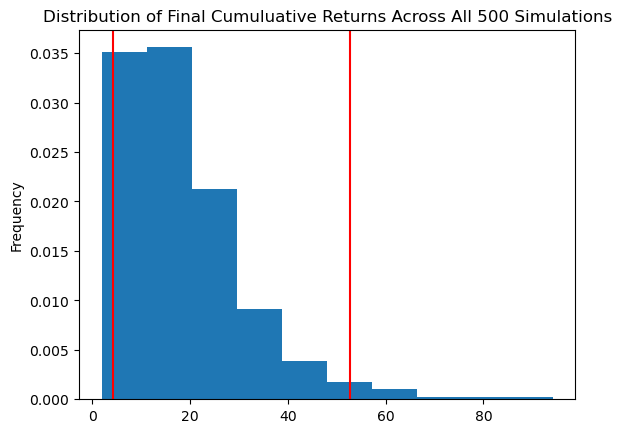

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_summary_stats = MC_thirty.summarize_cumulative_return()

# Print summary statistics
mc_summary_stats

AttributeError: 'Series' object has no attribute 'append'

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(mc_summary_stats[8]*initial_investment,2)
ci_upper = round(mc_summary_stats[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

NameError: name 'mc_summary_stats' is not defined

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(mc_summary_stats[8]*initial_investment,2)
ci_upper = round(mc_summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

NameError: name 'mc_summary_stats' is not defined

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
higher_risk_weights = [0.85,0.15]

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_higher_risk = MCSimulation(
    portfolio_data = df_stock_data,
    weights = higher_risk_weights,
    num_simulation = 500,
    num_trading_days = 252*5 
)
MC_higher_risk.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002060,1.001727,0.995779,0.997501,0.996082,0.998285,1.002456,1.008551,1.000780,1.001872,...,0.998819,0.998372,1.001921,1.002173,0.997688,0.998341,0.999176,0.996952,0.997770,1.000204
2,1.002151,1.004871,0.999872,0.998374,0.987685,0.998520,1.002062,1.005677,0.998275,1.001066,...,1.002729,0.998134,1.006017,1.002314,0.999356,0.988731,0.999481,0.997296,0.996013,0.997766
3,1.005080,1.004100,0.999094,1.000275,0.984748,0.996422,1.005393,1.005245,0.998357,0.999566,...,1.002729,0.994163,1.009686,1.003502,0.993724,0.993719,1.000856,0.997189,0.988739,0.993268
4,1.007551,1.005465,0.997582,0.995050,0.987450,1.000389,1.003748,1.002125,0.996584,0.999168,...,1.001161,0.995533,1.008256,1.001312,0.993235,0.993240,1.006147,0.998643,0.984746,0.991924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.145348,1.117445,0.897133,1.293675,1.111694,1.147622,1.150249,1.233030,1.077578,1.071763,...,1.148072,1.132319,1.084423,1.324126,1.124837,1.049999,1.180012,1.104754,1.000905,1.114880
1257,1.140667,1.111029,0.896715,1.294288,1.111391,1.146097,1.152618,1.234854,1.079644,1.070987,...,1.145794,1.133686,1.084042,1.320345,1.126388,1.048793,1.184044,1.107458,1.005703,1.114763
1258,1.132935,1.112689,0.894611,1.294069,1.107757,1.146950,1.152261,1.236257,1.080378,1.071906,...,1.144166,1.128361,1.086246,1.324418,1.124871,1.057199,1.184132,1.104253,1.003923,1.116151
1259,1.131671,1.111731,0.895443,1.292365,1.102527,1.147981,1.154128,1.236387,1.082964,1.072298,...,1.145289,1.132171,1.086988,1.325398,1.123764,1.059141,1.181569,1.104644,1.005352,1.116046


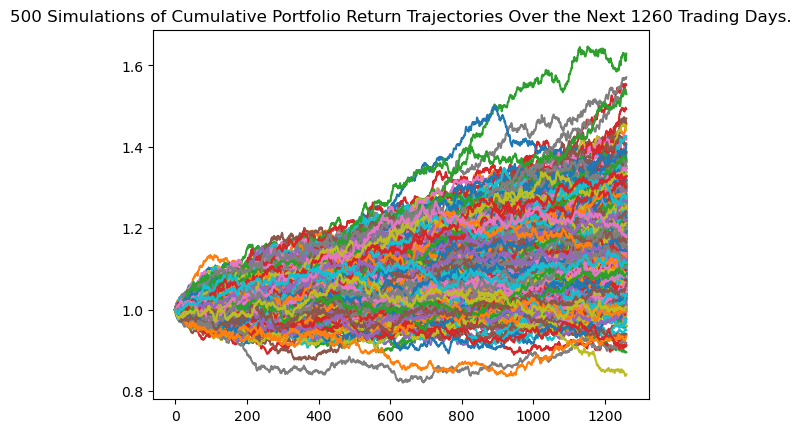

In [26]:
# Plot simulation outcomes
line_plot = MC_higher_risk.plot_simulation()

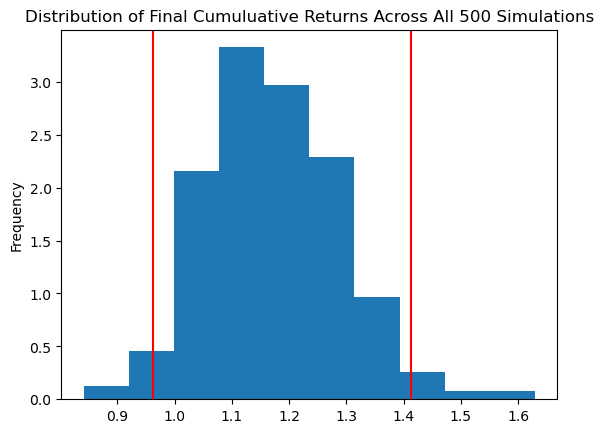

In [27]:
# Plot probability distribution and confidence intervals
higher_prob_plot = MC_higher_risk.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_higher_summary = MC_higher_risk.summarize_cumulative_return()

# Print summary statistics
mc_higher_summary

AttributeError: 'Series' object has no attribute 'append'

In [29]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(mc_higher_summary[8]*initial_investment,2)
ci_upper_ten = round(mc_higher_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'mc_higher_summary' is not defined

### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_higher_risk_10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = higher_risk_weights,
    num_simulation = 500,
    num_trading_days = 252*10 
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_higher_risk_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998186,0.999914,0.995280,0.997754,0.997579,1.002058,1.006826,1.001075,1.002320,0.999030,...,1.002924,1.000790,0.997889,1.001808,0.994837,1.000635,1.003119,1.003992,0.998859,0.995871
2,0.999204,0.999081,0.992807,0.997523,1.000235,1.001102,1.007561,1.007091,1.001878,0.995979,...,1.003073,0.996822,0.998919,0.999020,0.996700,0.996280,1.002425,1.003094,0.997303,0.996278
3,1.001398,1.000230,0.996479,0.994394,0.996801,1.002547,1.008039,1.010714,0.999561,0.994487,...,1.007132,0.994708,1.000795,0.998091,1.001869,0.997560,1.000511,1.002564,0.997164,0.995040
4,1.001922,0.999924,0.999805,0.994301,0.995015,0.999000,1.005857,1.010092,0.998836,0.999237,...,1.005845,0.997500,1.000940,0.995001,1.003934,0.998244,1.001973,1.001829,0.997042,0.994606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.505388,1.769011,1.389068,1.532902,1.259400,1.431939,1.366033,1.244845,1.281892,1.563243,...,1.502034,1.221461,1.135005,1.355443,1.231010,1.464302,1.572117,1.270768,1.569866,1.579962
2517,1.500823,1.770648,1.394624,1.538977,1.262934,1.432687,1.366714,1.246071,1.279171,1.565395,...,1.502666,1.221020,1.135421,1.352917,1.225741,1.463893,1.571599,1.267082,1.564184,1.577260
2518,1.505557,1.769622,1.393414,1.534749,1.262725,1.435631,1.369502,1.239597,1.277113,1.563529,...,1.499972,1.221833,1.138429,1.352082,1.218988,1.465462,1.574043,1.267434,1.564157,1.579303
2519,1.502764,1.773308,1.389736,1.532709,1.258965,1.440587,1.372949,1.241843,1.280689,1.565050,...,1.504521,1.216366,1.137048,1.355623,1.219852,1.469987,1.579211,1.266714,1.562458,1.575832


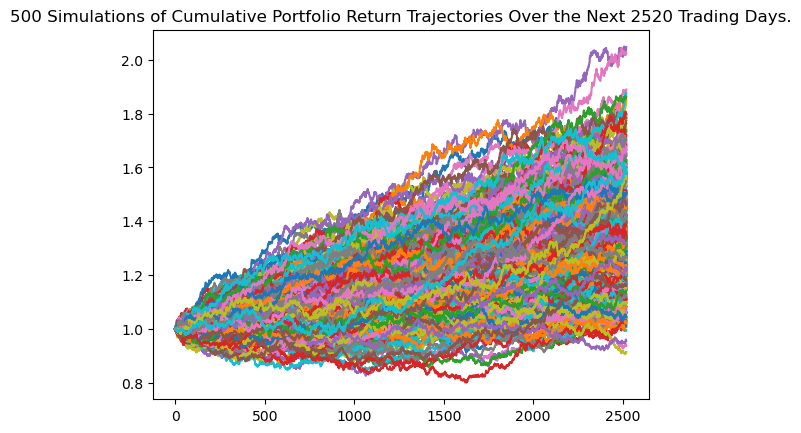

In [32]:
# Plot simulation outcomes
higher_plot_10 = MC_higher_risk_10.plot_simulation()

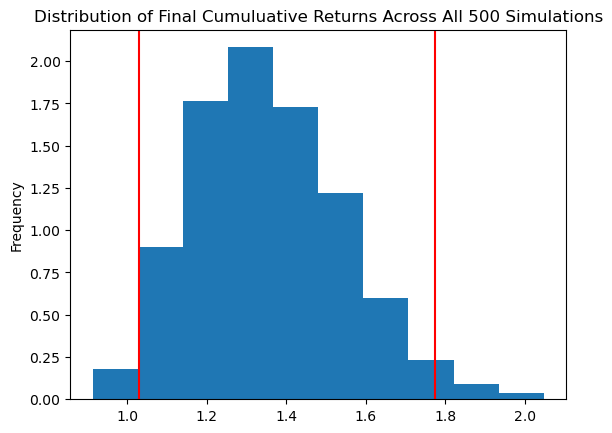

In [33]:
# Plot probability distribution and confidence intervals
higher_prob_plot_10 = MC_higher_risk_10.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_higher_summary_10 = MC_higher_risk_10.summarize_cumulative_return()

# Print summary statistics
mc_higher_summary_10

AttributeError: 'Series' object has no attribute 'append'

In [35]:
# Set initial investment
initial_investment = 60000


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(mc_higher_summary_10[8]*initial_investment,2)
ci_upper_ten = round(mc_higher_summary_10[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

NameError: name 'mc_higher_summary_10' is not defined